# Students performance in Examination
#### Marks secured by the students in college


#### Later we can understand the influence of various factors like economic, personal and social on the students performance

## Inferences made :
#### 1. How to imporve the students performance in each test ?
#### 2. What are the major factors influencing the test scores ?
#### 3. Effectiveness of test preparation course?
#### 4. Other inferences

#### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Let us read the data from the csv file

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

#### Display the  top few rows to understand about the various data columns

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Size of data frame

In [4]:
print (df.shape)#(rows,column)

(1000, 8)


#### Check for any missing values

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

####  Basic information of the data

count: The number of non-null values in each column.

mean: The mean (average) value of each column.

std: The standard deviation, a measure of the spread or dispersion of the data.

min: The minimum value in each column.

25%: The value below which 25% of the data falls (first quartile).

50%: The median value, or the value below which 50% of the data falls (second quartile).

75%: The value below which 75% of the data falls (third quartile).

max: The maximum value in each column.

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


####  Let us explore the Math Score first

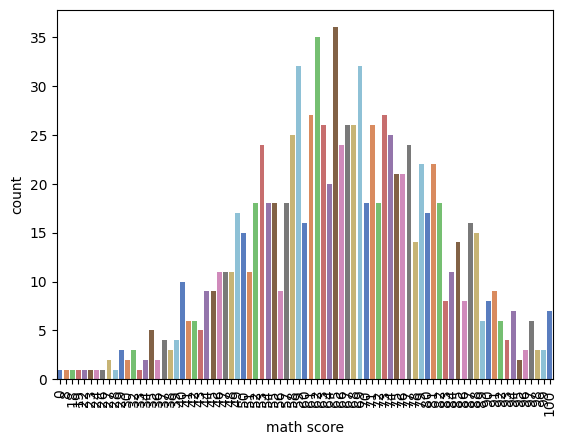

In [7]:
p = sns.countplot(x="math score", data = df,palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90)#it is used to rotate the x-axis tick labels of a matplotlib plot by 90 degrees.

From the above we can say that data is normally distributed

#MATH SCORE VS GENDER

Plotting Lineplot ,Scatterplot and Boxplot and making inferences.

<ipython-input-8-ede9983904e7>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  p = sns.lineplot(x="math score",y="gender", data = df, palette="muted")


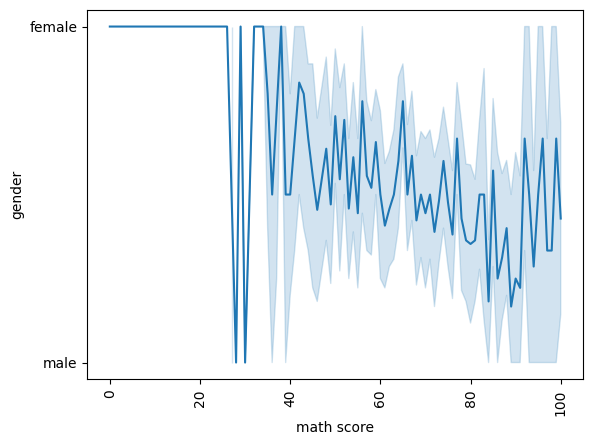

In [8]:
p = sns.lineplot(x="math score",y="gender", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90)


<ipython-input-9-def3f61878ab>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  p = sns.scatterplot(x="math score",y="gender", data = df, palette="muted")


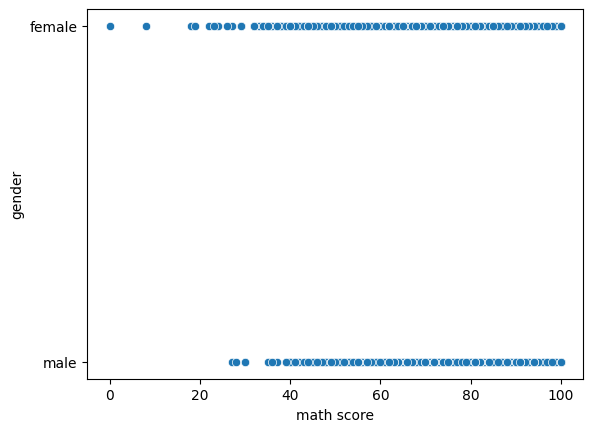

In [9]:
p = sns.scatterplot(x="math score",y="gender", data = df, palette="muted")

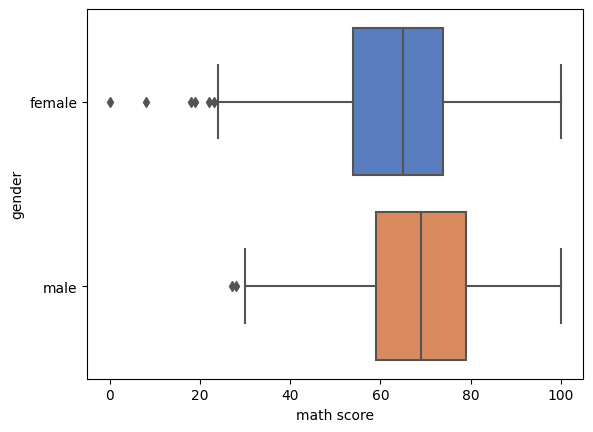

In [10]:
p = sns.boxplot(x="math score",y="gender", data = df, palette="muted")

Both boys and girls study well very well.Very few girls score low marks compared to boys.

#Comparing reading and writing score  with respect to gender

<Axes: xlabel='reading score', ylabel='writing score'>

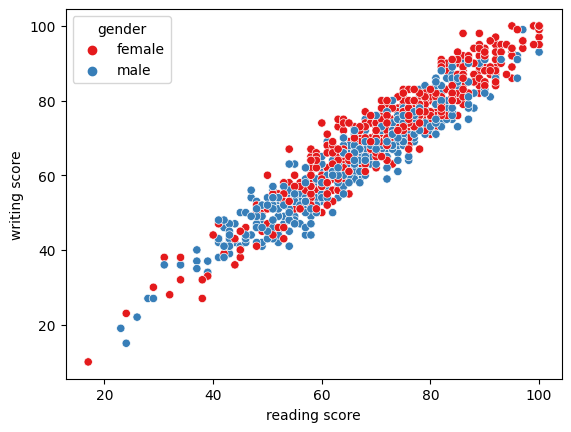

In [11]:
sns.scatterplot(x="reading score", y="writing score", data=df, hue="gender", palette="Set1")

<Axes: xlabel='reading score', ylabel='writing score'>

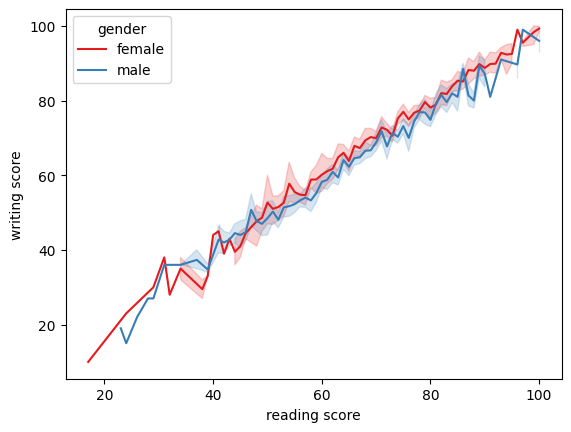

In [12]:
sns.lineplot(x="reading score", y="writing score", data=df, hue="gender", palette="Set1")

<ipython-input-13-babc02983cf7>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="parental level of education", y="math score", data=df, palette="muted")


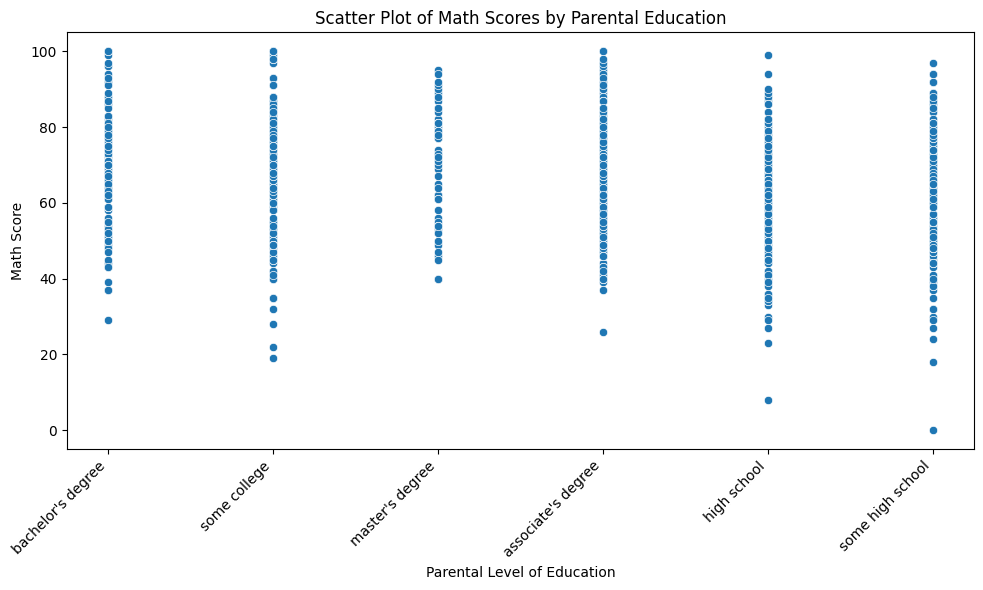

In [13]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(x="parental level of education", y="math score", data=df, palette="muted")

# Set title and labels
plt.title("Scatter Plot of Math Scores by Parental Education")
plt.xlabel("Parental Level of Education")
plt.ylabel("Math Score")
plt.xticks(rotation=45, ha="right")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Parental level Education plays a key role.Parental education of some high school their children are comparitively scoring less than others.

<Figure size 1000x600 with 0 Axes>

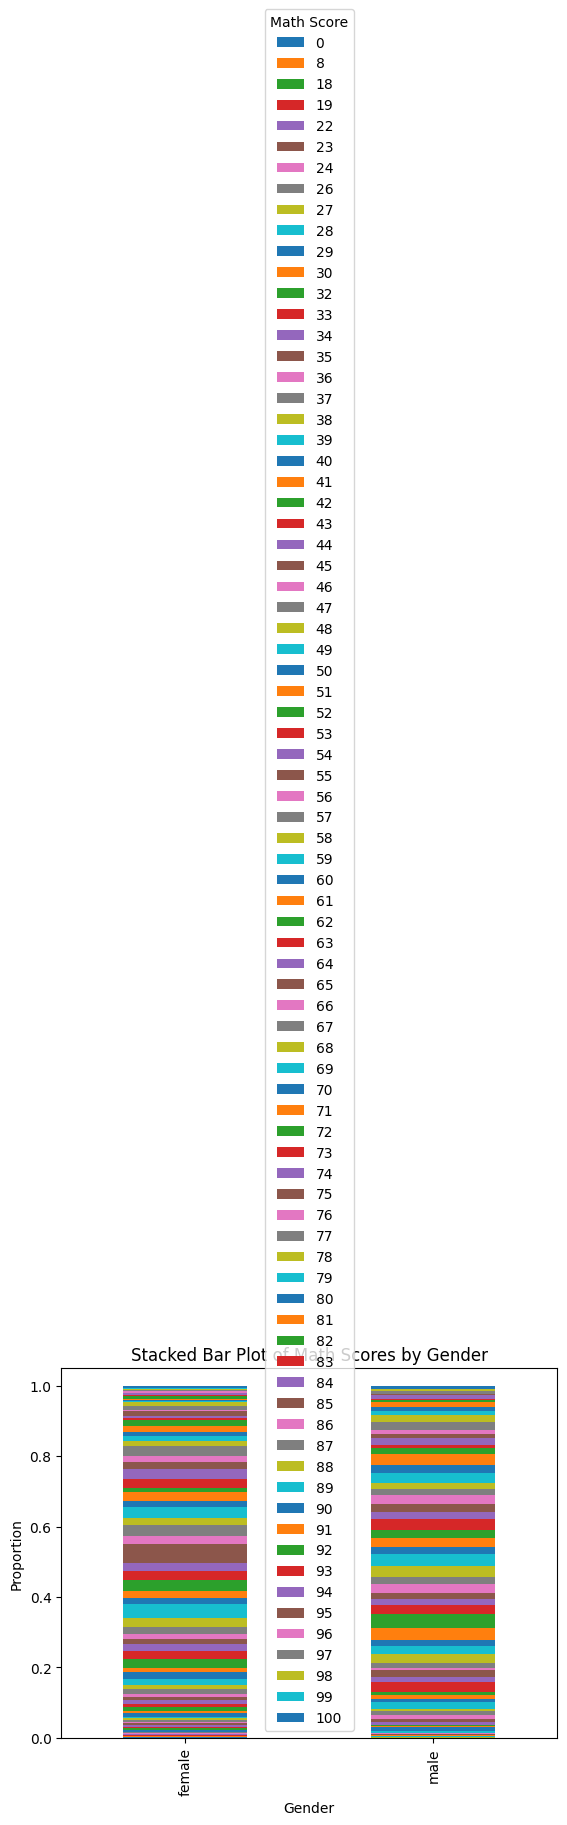

In [14]:
# Stacked bar plot
plt.figure(figsize=(10, 6))
df_stacked = df.groupby("gender")["math score"].value_counts(normalize=True).unstack()
df_stacked.plot(kind="bar", stacked=True)
plt.title("Stacked Bar Plot of Math Scores by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title="Math Score")
plt.show()

#### Inference:- Number of students passed in Maths Exam

In [15]:
passmark =40
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

960 Students have passed and 40 have failed .Let us see how the Histogram dipicts the Graph

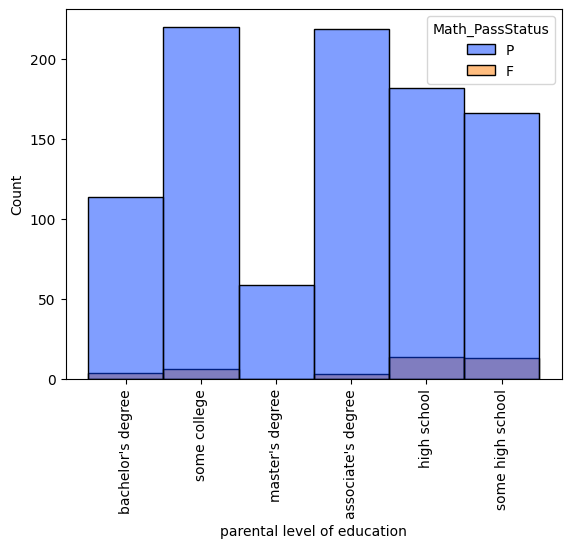

In [16]:
p = sns.histplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

The above bar graph depicts how students pass status of the exam.A few of the students whose parents are having masters degree score low compared to others.

Parents having high school eduaction their children have most failures than other

#### Let us explore the Reading score

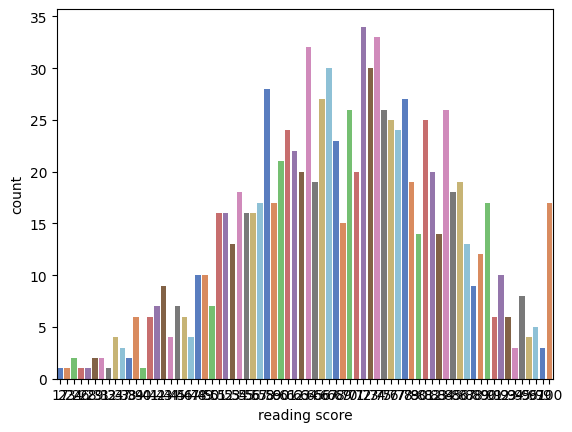

In [17]:
sns.countplot(x="reading score", data = df, palette="muted")
plt.show()

Data seems to be slighlty skewed to the left.

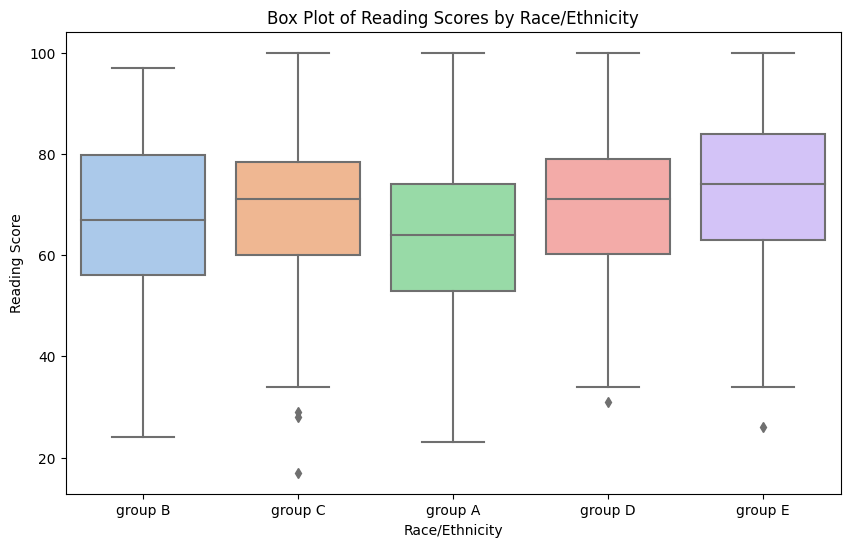

In [18]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="race/ethnicity", y="reading score", data=df, palette="pastel")
plt.title("Box Plot of Reading Scores by Race/Ethnicity")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Reading Score")
plt.show()

We can observe outliers in Group C ,D and E.

#### Inference:-Number of Students Passed in Reading

In [19]:
passmark=40
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

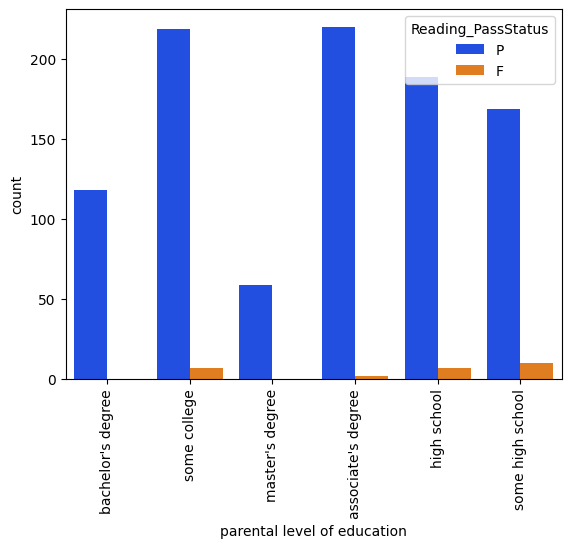

In [20]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

In total around 26 students have failed in Reading other have passed.Parents who have education level of assiciate degree or some college their children perform well and have good pass percentage

#### Exploring writing score

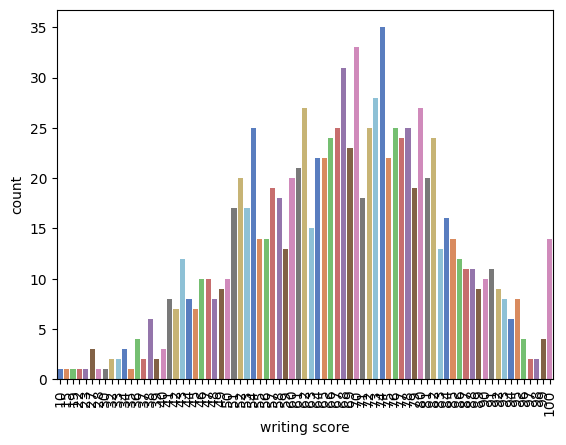

In [21]:
p = sns.countplot(x="writing score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90)

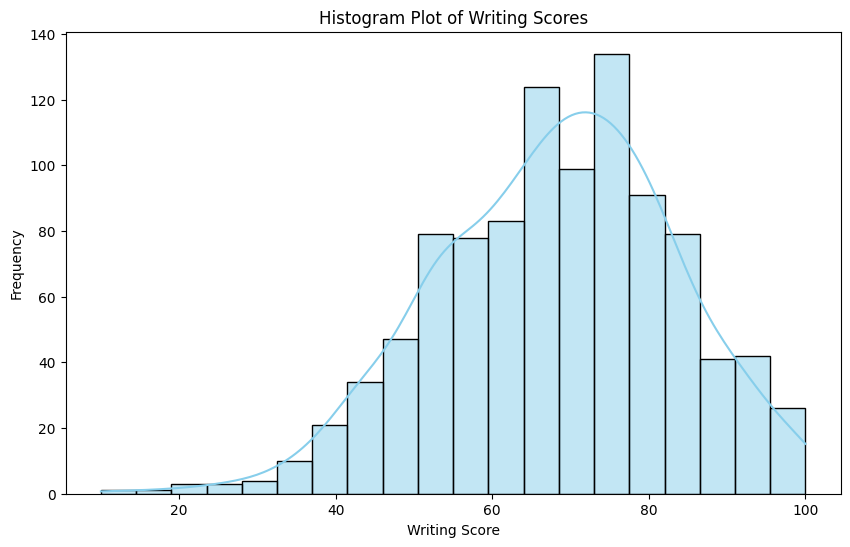

In [22]:
# Histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="writing score", bins=20, kde=True, color="skyblue")
plt.title("Histogram Plot of Writing Scores")
plt.xlabel("Writing Score")
plt.ylabel("Frequency")
plt.show()

#### Inference: No.of Students Passed in Writing

In [23]:
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

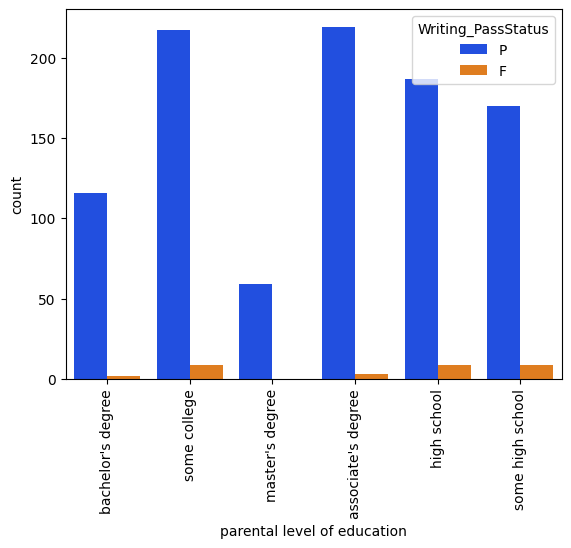

In [24]:
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

#### Iet us check "How many students passed in all the subjects ?"

In [25]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

P    949
F     51
Name: OverAll_PassStatus, dtype: int64

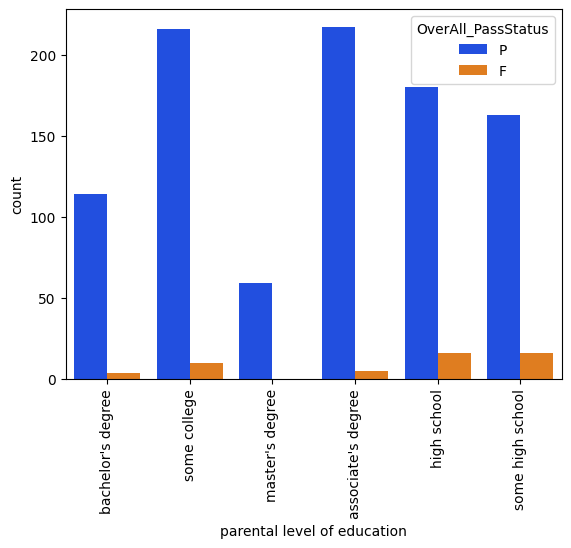

In [26]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

OVERALL 🥇

In total around 51 students have failed out of 1000 and others have passed.Parents who have education level of assoiciate degree or some college their children perform well and have good pass percentage.Parents who have some high school degree thier children perform less than others.

#### Find the percentage of marks

In [27]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

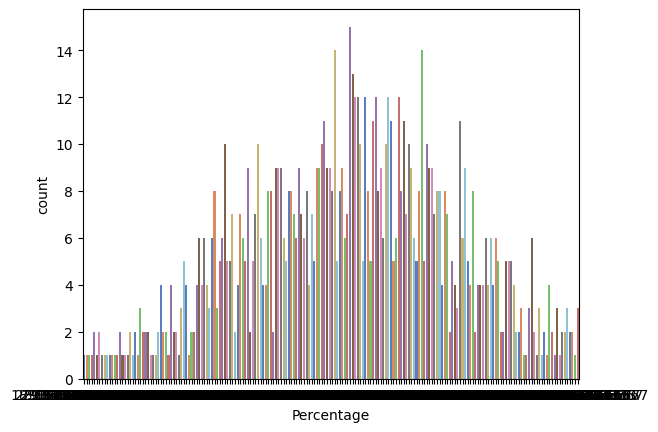

In [28]:
p = sns.countplot(x="Percentage", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=0)

<ipython-input-29-e4ebcfa87bd0>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df["Percentage"], color="b", shade=True)


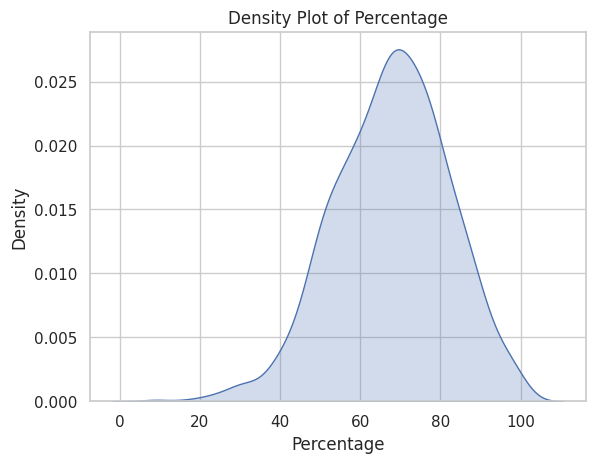

In [29]:
# Create a density plot
sns.set(style="whitegrid")
sns.kdeplot(data=df["Percentage"], color="b", shade=True)

# Set the plot labels and title
plt.xlabel("Percentage")
plt.ylabel("Density")
plt.title("Density Plot of Percentage")

# Show the plot
plt.show()

#### Let us assign the grades

### Grading
####    above 80 = A Grade
####      70 to 80 = B Grade
####      60 to 70 = C Grade
####      50 to 60 = D Grade
####      40 to 50 = E Grade
####    below 40 = F Grade  ( means Fail )


In [30]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else:
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

#### we will plot the grades obtained in a order

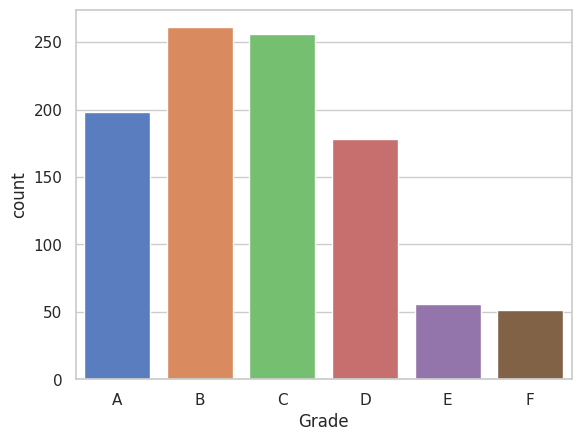

In [31]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

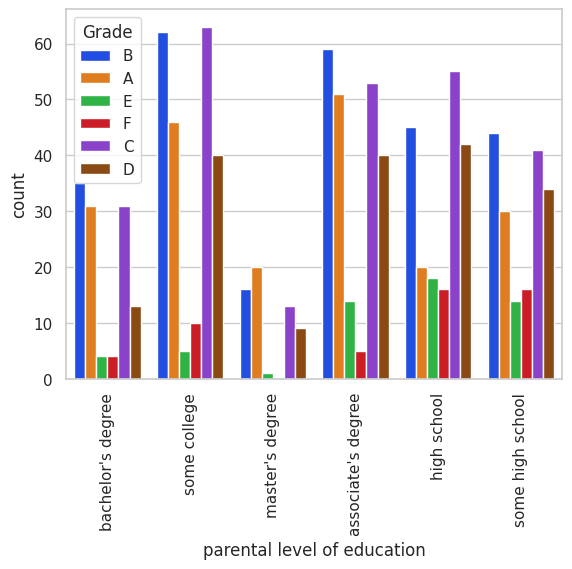

In [34]:
p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

Grade B and C are common among the students and couple of students have failed too!!.